# Advanced Course in Machine Learning
## Exercise Session 2


<span style="color:blue">**Sanaz Jamalzadeh**</span>

## 1. Estimating the risk with Monte Carlo (programming exercise)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#### Exercise 1.b

In [2]:
def MonteCarloRisk(alpha, M):
    x = np.random.uniform(-3, 3, M)
    y=np.random.uniform(2*x-0.5, 2*x+0.5, M)
    return np.mean((y - alpha*x)**2)

def true_risk_value(alpha):
    return (3*(2 - alpha)**2) + (1/12)

#### Exercise 1.c

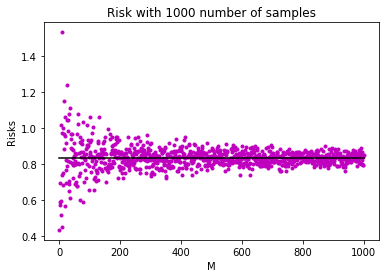

In [4]:

alfa = 1.5
risks = list()

# I have tested several estimate for M =10, 100, 1000, 100000, and here is M= 1000
M_p = range(1, 1001)


#plot MonteCarlo risk for M =1000
for M in M_p:
    risks.append(MonteCarloRisk(alfa, M))

plt.plot(M_p, risks, 'm.')
plt.xlabel('M')
plt.ylabel('Risks')
plt.title('Risk with ' + str(M_p[-1]) + ' number of samples')

#plot the true risk value
risk = [true_risk_value(1.5)] * len(M_p)
plt.plot(M_p, risk, 'k-', label ="true risk value")

plt.show()

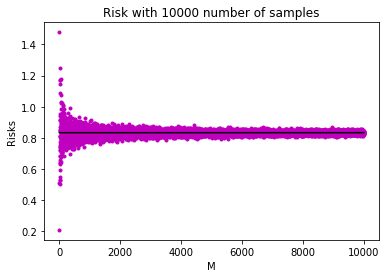

In [5]:

alfa = 1.5
risks = list()

# I have tested several estimate for M =10, 100, 1000, 100000, and here is M=10000
M_p = range(1, 10001)


#plot MonteCarlo risk for M =10000
for M in M_p:
    risks.append(MonteCarloRisk(alfa, M))

plt.plot(M_p, risks, 'm.')
plt.xlabel('M')
plt.ylabel('Risks')
plt.title('Risk with ' + str(M_p[-1]) + ' number of samples')


#plot the true risk value
risk = [true_risk_value(1.5)] * len(M_p)
plt.plot(M_p, risk, 'k-', label ="true risk value")

plt.show()




We can see that from M = 1000, estimates are getting close to the true values. About number of samples that we would need for estimating the risk,
I think it depends on our task. For example if we want to compare R(1.5) to R(2), the true difference from R(1.5) would be (3*(0.5)^2 + 1/12- (3*0 + 1/12)) -0 which equals 0.75, so the M 
could be quite small values (less than 10 for example) as we do not need very accurate estimation becasue R(2) is small. But if we compare R(1.5)
to R(1.51) which has 0.72 as true risk compared to 0.75 for example we need higher M to get required accuracy. 

## 4. Stochastic gradient descent (programming exercise)

#### Exercise 5.a

In [7]:
# Read the data file

dataFile = "problem4data.csv"

def d():
    data = pd.read_csv(dataFile, delimiter=",", dtype="float64", header=None)
    y = data[2].values
    X = data.loc[:, :1]
    
    return X, y

X_train, y_train = d()

# X_train is a matrix 2x500 (two first columns)
# y_train is a vector (third column)

In [8]:
# Compute the Loss based on loss formula

def computeLoss(x, y, w):
    return np.mean(((x @ w) - y)**2)   #norm2 form of emprical risk formula in exercise


In [9]:
# Compute analytical solution and optimal gradient

X_train, y_train = d()

w_analytic = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

analytic_loss = computeLoss(X_train, y_train, w_analytic)

print('analytic solution equals:\n', w_analytic)
print('loss(analytical) :\n', analytic_loss)

analytic solution equals:
 0    0.282239
1    0.761553
dtype: float64
loss(analytical) :
 0.5977902719916254


#### The analytical solution is w = [0.282, 0.761], and loss value based on that equals 0.597

In [10]:
# Function MiniBatch, it returns a tuple of the next batch of x and y

def Minibatch(X, y, i, batchSize):
        return (X[i:i + batchSize], y[i:i + batchSize])


In [11]:
# Compute gradient based on gradient formula

def computeGradient(x, y, w):
    return 2 * (((x @ w) - y) @ x) / len(x)

In [12]:
# Function stepsize, Deterministic or AdaGrad, it needs alpha, beta and sum-squared of gradient computed in iter t

def step_size(alpha_zero, beta, gradian_squared, t, method="Deterministic"):
    if method == "Deterministic":
        return alpha_zero / (1 + alpha_zero * beta * t)
    
    if method == 'AdaGrad': #alpha_zero and beta here respresent eta and tau in AdaGrad formula
        return alpha_zero / (beta + np.sqrt(gradian_squared))


In [13]:
# SGD function, main loop

# Initial Values 
M=10
features=(X_train.shape[1])
t = 0

start = np.array([-2.5, -2.5])  # have tried different positive and negative values not close to optimal solution

# n_epoc can change in different tests (next parts of exe)

def SGD (alpha_zero, beta, M, features, method="Deterministic", init = start, n_epoch = 10):
    
    X_train, y_train = d()
        
    # initialize w
    w = init 
    

    gradian_squared = np.zeros_like(w)
    
    # define number of iterations
    n_iters = math.ceil(len(X_train) / M)
    
    N = len(X_train)
    
    W = w


# check which method to choose for step_size based on input

    if method=="Deterministic":
        step_sizes = [step_size(alpha_zero, beta, gradian_squared, t, method)]
    else:
        step_sizes = step_size(alpha_zero, beta, gradian_squared, t, method)

    epoch = 0    
    
    train_losses = []
    
    iteration_losses = []
    
    while epoch < n_epoch:
        mean_loss = 0

# Permute sample in each epoch randomly (we could also do random shuffle)
        
        ind = np.random.permutation(list(range(N)))
        
        X_train = X_train.iloc[ind]
        
        y_train = y_train[ind]
        
        for i in range(n_iters):
            
            x, y = Minibatch(X_train, y_train, i*M, M)
            
            Loss = computeLoss(x, y, w)
            
            Grad = computeGradient(x, y, w)

            step = step_size(alpha_zero, beta, gradian_squared, epoch*n_iters + i, method)
            
            w -= step * Grad
            
            gradian_squared += np.square(Grad)
            
            mean_loss += Loss
            
            iteration_losses.append(Loss)
            
            W = np.vstack((W, w))
            
            if np.isscalar(step):
                
                step_sizes.append(step)
                
            else:
                
                step_sizes = np.vstack((step_sizes, step))
            
        train_losses.append(mean_loss / n_iters)

        epoch += 1

    return train_losses, iteration_losses, w, W, step_sizes


#### Exercise 5.b

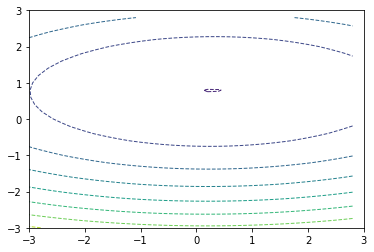

In [14]:
# Progress of the algorithm in the two-dimensional parameter-space for M ∈ {1, 10, 100}


# create just an empty contour of loss

coordinates = np.arange(-3, 3, 0.2)

x_c, y_c = np.meshgrid(coordinates, coordinates)
Surf_L = np.zeros((len(coordinates), len(coordinates)), dtype="float64")

for i in range(len(x_c)):
    for j in range(len(y_c)):
        Surf_L[j,i] = computeLoss(X_train, y_train, [x_c[j,i], y_c[j,i]]) #creates loss contour

plt.contour(x_c, y_c, Surf_L, linestyles='dashed', linewidths=1)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

In [16]:
# then plot convergence for M = 1, 10 , 100 using part 5.a. These are for deterministic method. Same could
# be done for Adagrad method as well.

M = 1
# assign small value to epoc here for visualization, small values for alpha results in low convergence
start = np.array([-2.5, -2.5])
train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.01, M, features, method= "Deterministic", init = start, n_epoch = 10)


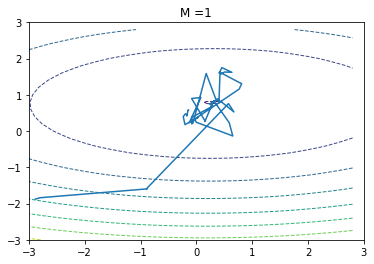

In [17]:
coordinates = np.arange(-3, 3, 0.2)

x_c, y_c = np.meshgrid(coordinates, coordinates)
Surf_L = np.zeros((len(coordinates), len(coordinates)), dtype="float64")

for i in range(len(x_c)):
    for j in range(len(y_c)):
        Surf_L[j,i] = computeLoss(X_train, y_train, [x_c[j,i], y_c[j,i]]) #creates loss contour

plt.contour(x_c, y_c, Surf_L, linestyles='dashed', linewidths=1)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot(W[:50,0], W[:50,1]) #NOT use all data
    
plt.title('M =1')
plt.show()

In [18]:
# then start from one initial point and plot convergence for M = 1, 10 , 100


M = 10
# assign small value to epoc here to visualize the convergence better in contour
start = np.array([-2.5, -2.5])
train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.01, M, features, method= "Deterministic", init = start, n_epoch = 10)

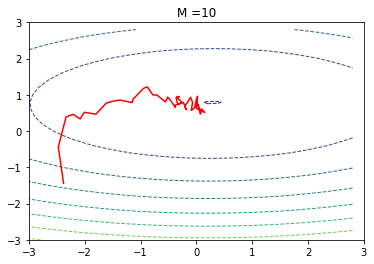

In [19]:
coordinates = np.arange(-3, 3, 0.2)

x_c, y_c = np.meshgrid(coordinates, coordinates)
Surf_L = np.zeros((len(coordinates), len(coordinates)), dtype="float64")

for i in range(len(x_c)):
    for j in range(len(y_c)):
        Surf_L[j,i] = computeLoss(X_train, y_train, [x_c[j,i], y_c[j,i]]) #creates loss contour

plt.contour(x_c, y_c, Surf_L, linestyles='dashed', linewidths=1)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot(W[:50,0], W[:50,1], c ='red') #NOT use all data
    
plt.title('M =10')
plt.show()

In [20]:
# then start from one initial point and plot convergence for M = 1, 10 , 100


M = 100
# assign small value to epoc here to visualize the convergence better in contour
start = np.array([-2.5, -2.5])
train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.01, M, features, method= "Deterministic", init = start, n_epoch = 10)

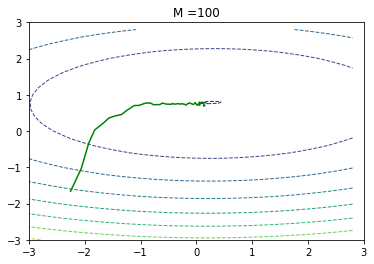

In [21]:
coordinates = np.arange(-3, 3, 0.2)

x_c, y_c = np.meshgrid(coordinates, coordinates)
Surf_L = np.zeros((len(coordinates), len(coordinates)), dtype="float64")

for i in range(len(x_c)):
    for j in range(len(y_c)):
        Surf_L[j,i] = computeLoss(X_train, y_train, [x_c[j,i], y_c[j,i]]) #creates loss contour

plt.contour(x_c, y_c, Surf_L, linestyles='dashed', linewidths=1)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot(W[:50,0], W[:50,1], c ='green') #NOT use all data
    
plt.title('M =100')
plt.show()

In case of M =1 we could see that trajectory to optimal solutions is not smooth and jumping aroound, for M =10 it improves and converges better while for M =100 it goes smoothly to the optimal solution.

#### Exercise 5.c

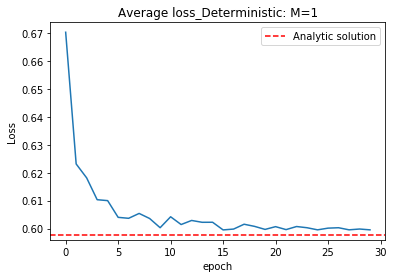

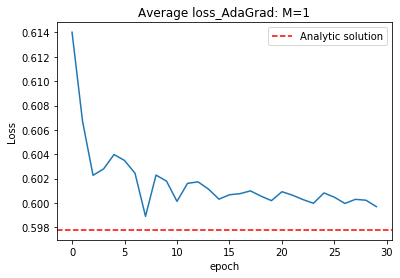

In [26]:
# Convergence plots in term of epocs for M = 1, 10, 100, and different methods 

M = 1
start = np.array([-2.5, -2.5])
for method in ["Deterministic", "AdaGrad"]:
    if method=="AdaGrad":
        train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.9, M, features, method= method, init = start,  n_epoch = 30)
    else:
        train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.01, M, features, method= method, init = start, n_epoch = 30)
    
    plt.plot(train_loss)
    plt.axhline(analytic_loss, linestyle='--', c="red", label="Analytic solution")
    plt.xlabel("epoch")
    plt.ylabel("Loss")
    plt.title('Average loss_' + r"{}: M={}".format(method,M))
    plt.legend()
    plt.show()

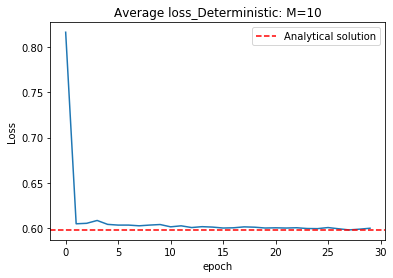

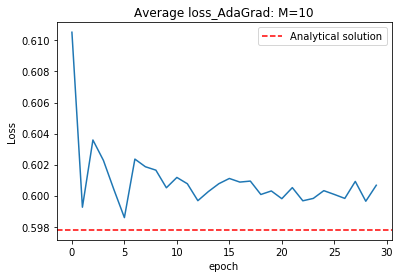

In [27]:
M = 10
start = np.array([-2.5, -2.5])
for method in ["Deterministic", "AdaGrad"]:
    if method=="AdaGrad":
        train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.9, M, features, method= method, init = start, n_epoch = 30)
    else:
        train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.01, M, features, method= method, init = start, n_epoch = 30)
    
    plt.plot(train_loss)
    plt.axhline(analytic_loss, linestyle='--', c="red", label = 'Analytical solution')
    plt.xlabel("epoch")
    plt.ylabel("Loss")
    plt.title('Average loss_' + r"{}: M={}".format(method,M))
    plt.legend()
    plt.show()

#### The average losses converge smoothly, actually for both methods. Step size changes for Adagrad might result in bettrer convergence. 

#### Convergence plots in term of Mini_batches for M = 1, 10 and different methods 

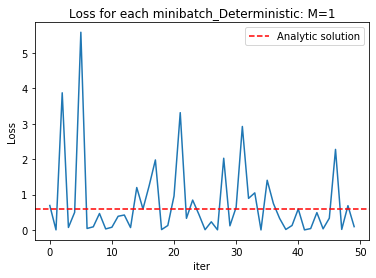

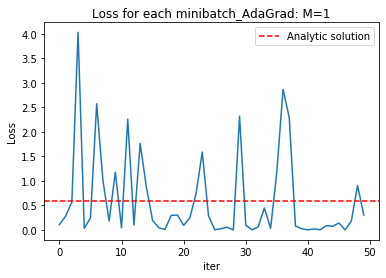

In [28]:
M = 1
start = np.array([-2.5, -2.5])
for method in ["Deterministic", "AdaGrad"]:
    if method=="AdaGrad":
        train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.9, M, features, init = start, method= method,  n_epoch = 30)
    else:
        train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.01, M, features, init = start, method= method,  n_epoch = 30)
    
    plt.plot(iteration_loss[:50]) #NOT for all iterations
    plt.axhline(analytic_loss, linestyle='--', c="red", label="Analytic solution")
    plt.xlabel("iter")
    plt.ylabel("Loss")
    plt.title('Loss for each minibatch_' + r"{}: M={}".format(method,M))
    plt.legend()
    plt.show()




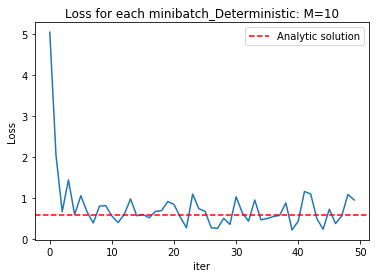

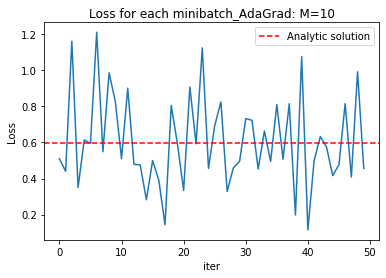

In [29]:
M = 10
start = np.array([-2.5, -2.5])
for method in ["Deterministic", "AdaGrad"]:
    if method=="AdaGrad":
        train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.9, M, features, init = start, method= method,  n_epoch = 30)
    else:
        train_loss, iteration_loss, w, W, step_sizes  = SGD(0.6, 0.01, M, features, init = start, method= method,  n_epoch = 30)
    
    plt.plot(iteration_loss[:50]) #NOT for all iterations
    plt.axhline(analytic_loss, linestyle='--', c="red", label="Analytic solution")
    plt.xlabel("iter")
    plt.ylabel("Loss")
    plt.title('Loss for each minibatch_' + r"{}: M={}".format(method,M))
    plt.legend()
    plt.show()



#### Mini batch losses are noisy accoridng to these plots. Also, there is not significant difference between deterministic and AdaGrad method here. So I could not conclude anything about convergence based on mini batch loss. 